In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage import color
from skimage.transform import resize

### 1. Read the images and generate the train and test dataset (10 points)

In [2]:
DATADIR = r"C:\Users\IC016726\Desktop\Python_excercise\R8External\Week2\plant-seedlings-classification\train"
CATEGORIES=["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]

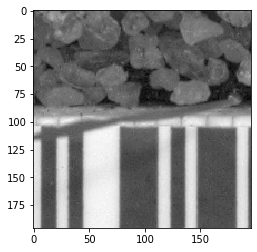

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = io.imread(os.path.join(path,img),as_gray=True)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

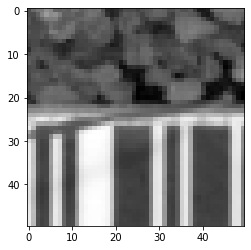

In [4]:
img_size=50
new_array = resize(img_array, (img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data = []
img_size=50

def create_trainning_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = io.imread(os.path.join(path,img),as_gray=True)      
            new_array = resize(img_array, (img_size,img_size))
            training_data.append([new_array,class_num])    

In [6]:
create_trainning_data()

In [7]:
print(len(training_data))

4750


In [8]:
X=[]
Y=[]

In [9]:
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,1)

In [10]:
X.shape

(4750, 50, 50, 1)

In [11]:
Y = np.array(Y)

In [12]:
Y.shape

(4750,)

### 2. Divide the data set into Train and validation data sets ( 10 points)

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 3. Initialize & build the model (20 points)

In [15]:
print(min(y_train),max(y_train))

0 11


In [16]:
print(min(y_test),max(y_test))

0 11


In [17]:
#One-hot encoding the labels
y_train = np_utils.to_categorical(y_train, 12)
y_test = np_utils.to_categorical(y_test, 12)

In [18]:
y_train.shape

(3182, 12)

In [19]:
y_test.shape

(1568, 12)

In [20]:
X_train.shape

(3182, 50, 50, 1)

In [21]:
X_test.shape

(1568, 50, 50, 1)

In [22]:
#Reshape the data
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 50, 50, 1).astype('float32')

In [23]:
#Normalize both the train and test image data from 0-255 to 0-1
X_train /= 255
X_test /= 255

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D

In [37]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_test, y_test))

Train on 3182 samples, validate on 1568 samples
Epoch 1/10
3182/3182 [==============================] - 35s 11ms/step - loss: 2.3014 - acc: 0.1992 - val_loss: 13.3201 - val_acc: 0.1033
Epoch 2/10
3182/3182 [==============================] - 33s 10ms/step - loss: 1.9267 - acc: 0.3558 - val_loss: 15.3780 - val_acc: 0.0459
Epoch 3/10
3182/3182 [==============================] - 33s 10ms/step - loss: 1.5556 - acc: 0.4714 - val_loss: 13.7631 - val_acc: 0.0612
Epoch 4/10
3182/3182 [==============================] - 33s 11ms/step - loss: 1.0616 - acc: 0.6521 - val_loss: 15.3780 - val_acc: 0.0459
Epoch 5/10
3182/3182 [==============================] - 33s 10ms/step - loss: 0.9414 - acc: 0.6895 - val_loss: 13.9183 - val_acc: 0.1365
Epoch 6/10
3182/3182 [==============================] - 34s 11ms/step - loss: 0.4719 - acc: 0.8501 - val_loss: 14.8126 - val_acc: 0.0810
Epoch 7/10
3182/3182 [==============================] - 33s 10ms/step - loss: 0.2787 - acc: 0.9095 - val_loss: 13.8689 - val_acc: 

We go a very low validation score for the above CNN model. We will optimize it below

### 4. Optimize the model (15 points)

We can optimize the CNN layer by tuning the following hyperparameter
1. Filter Size
2. Number of Filters
3. Strides
4. Padding
5. Kernel Regularization

Also we can add dropout layer to generalize the dense layer.

In [50]:
#Building up a Sequential model
from keras.layers import GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D,MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(1000, activation='relu')) 
# Dropout
model1.add(Dropout(0.25))
model1.add(Dense(800, activation='relu')) 
model1.add(Dense(12, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 64)                0         
__________

In [51]:
model1.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [52]:
batch_size=32
epochs = 10
model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 3182 samples, validate on 1568 samples
Epoch 1/10
3182/3182 [==============================] - 11s 3ms/step - loss: 0.2822 - acc: 0.9167 - val_loss: 0.2808 - val_acc: 0.9167
Epoch 2/10
3182/3182 [==============================] - 9s 3ms/step - loss: 0.2811 - acc: 0.9167 - val_loss: 0.2805 - val_acc: 0.9167
Epoch 3/10
3182/3182 [==============================] - 9s 3ms/step - loss: 0.2811 - acc: 0.9167 - val_loss: 0.2805 - val_acc: 0.9167
Epoch 4/10
3182/3182 [==============================] - 12s 4ms/step - loss: 0.2812 - acc: 0.9167 - val_loss: 0.2808 - val_acc: 0.9167
Epoch 5/10
3182/3182 [==============================] - 9s 3ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2804 - val_acc: 0.9167
Epoch 6/10
3182/3182 [==============================] - 9s 3ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2805 - val_acc: 0.9167
Epoch 7/10
3182/3182 [==============================] - 9s 3ms/step - loss: 0.2809 - acc: 0.9167 - val_loss: 0.2807 - val_acc: 0.9167
Epoch 8/10
3

Tried with 32,64,128 no of filters, stride of (2,2), filter size of (5,5). All the model gave val_acc of 0.9167. Hence this is the optimial model which gives the same result of 91%

### 5. Predict the accuracy for both train and validation data (5 points)

In [42]:
#Evaluate the model on the train data
score = model1.evaluate(X_train, y_train)

#Accuracy on test data
print('Accuracy on the Train Images: ', score[1])

3182/3182 [==============================] - 2s 611us/step
Accuracy on the Train Images:  0.9166666269302368


In [43]:
#Evaluate the model on the test data
score = model1.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

1568/1568 [==============================] - 1s 640us/step
Accuracy on the Test Images:  0.9166666269302368
